In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud,STOPWORDS
import nltk
import re
import string
import emoji
import nltk
from sklearn.metrics import roc_auc_score
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from PIL import Image
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import brier_score_loss
from sklearn.metrics import log_loss
from collections import Counter
from sklearn.metrics import precision_recall_curve, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
import nltk
from sklearn.metrics import matthews_corrcoef
from nltk.corpus import stopwords
from transformers import TFAutoModel
from tensorflow.keras.optimizers import Adam
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
import string
from matplotlib.font_manager import FontProperties
from transformers import AutoTokenizer, TFAlbertModel
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
nltk.download('omw-1.4')
%matplotlib inline

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<a id="Read Data"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Read Data</p> </center>

In [2]:
wordcloud_mask=np.array(Image.open("/kaggle/input/word-cloud-5/stormtrooper_mask.png"))

In [3]:
data=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding='latin-1')

In [4]:
my_font="/kaggle/input/hack-font/Hack-Bold.ttf"

In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<a id="Drop Unwanted Columns"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Drop Unwanted Columns</p> </center>

In [6]:
data=data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<a id="Rename Columns"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Rename Columns</p> </center>

In [8]:
data=data.rename(columns={"v1":"label","v2":"Text"})

In [9]:
data.head()

,label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<a id="Replace"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Replace</p> </center>
* ham==0
* spam==1

In [10]:
data['label'].replace({"ham": 0, "spam": 1}, inplace=True)

In [11]:
data.head()

,label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<a id="Data Analysis"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Data Analysis</p> </center>

In [12]:
data.isnull().sum()

label    0
Text     0
dtype: int64

<a id="Label Counts"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Label Counts</p> </center>

In [13]:
data["label"].value_counts()

0    4825
1     747
Name: label, dtype: int64

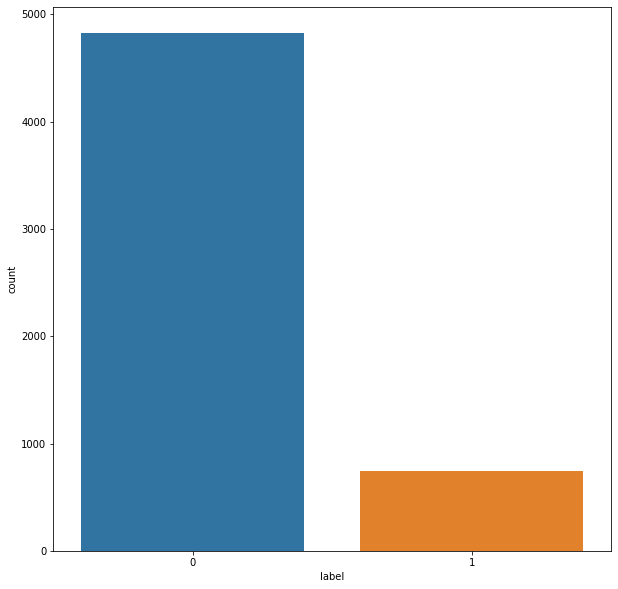

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(x ='label', data = data)
plt.show()
 

<a id="Count Number of Character  in Each sentence"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:80%">Count Number of Character  in Each sentence</p> </center>


In [15]:
data['number_character']=data['Text'].apply(len)

In [16]:
data.head()

,label,Text,number_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


<a id="Count Number of Words in Each Sentence"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:80%">Count Number of Words in Each Sentence</p> </center>

In [17]:
data['number_of_words'] = data['Text'].apply(lambda x: len(x.split()))


In [18]:
data.head()

,label,Text,number_character,number_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


<a id="Counter Number of Sentences In Each Row"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:80%">Counter Number of Sentences In Each Row</p> </center>

In [19]:
data['number_sentence'] = data['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [20]:
data.head()

,label,Text,number_character,number_of_words,number_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [21]:
data.describe()

,label,number_character,number_of_words,number_sentence
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,80.118808,15.494436,1.970747
std,0.340751,59.690841,11.329427,1.417778
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,7.000000,1.000000
50%,0.000000,61.000000,12.000000,1.000000
75%,0.000000,121.000000,23.000000,2.000000
max,1.000000,910.000000,171.000000,28.000000


<a id="Correlation Matrix"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Correlation Matrix</p> </center>


In [22]:
corr=data.corr()

In [23]:

data_corr=corr.style.background_gradient(cmap="Set3_r").set_table_styles([{'selector': 'td','props': [('font-size', '10pt'),('padding', '10px')]}])
data_corr.set_properties(**{'width': '70px', 'height': '70px'})
display(data_corr)


,label,number_character,number_of_words,number_sentence
label,1.000000,0.387285,0.290263,0.290500
number_character,0.387285,1.000000,0.973725,0.646715
number_of_words,0.290263,0.973725,1.000000,0.646765
number_sentence,0.290500,0.646715,0.646765,1.000000


<Figure size 720x720 with 0 Axes>

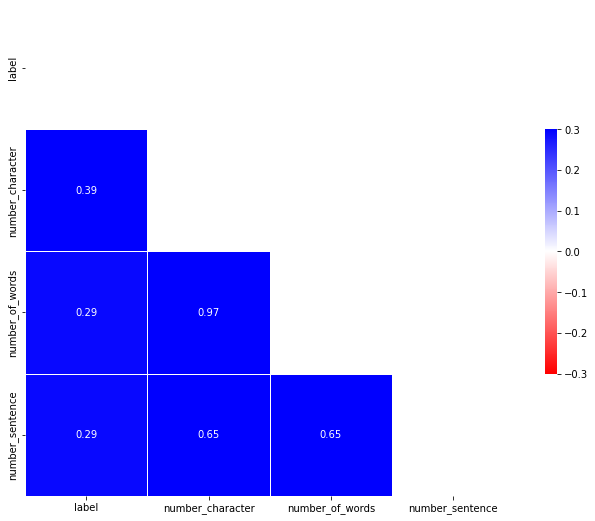

In [24]:
plt.figure(figsize=(10,10))
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 120, as_cmap=True)
sns.heatmap(
    corr,          # The data to plot
    mask=mask,     # Mask some cells
    cmap='bwr_r',     # What colors to plot the heatmap as
    annot=True,    # Should the values be plotted in the cells?
    vmax=.3,       # The maximum value of the legend. All higher vals will be same color
    vmin=-.3,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .5}) # Extra kwargs for the legend; in this case, shrink by 50%

plt.show()

* ham==0
* spam==1

<a id="Ham Data Length Vs Spam Data Length"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:80%">Ham Data Length Vs Spam Data Length</p> </center>


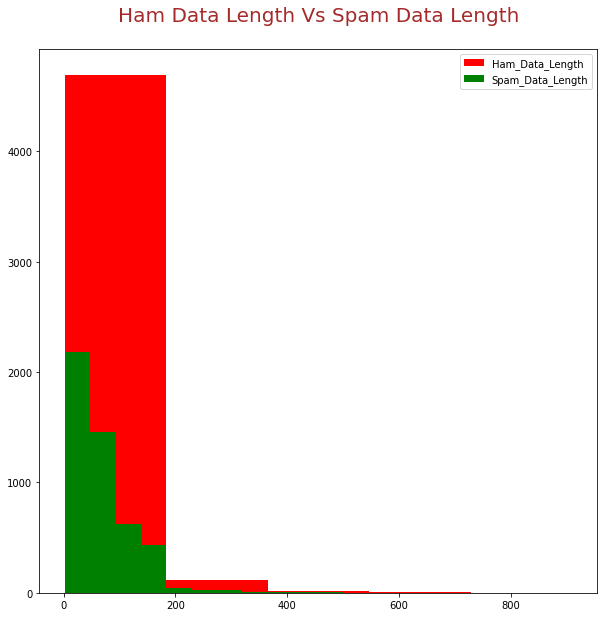

In [25]:
ham_data_len=data[data["label"]==0]["Text"].str.len()
spam_data_len=data[data["label"]==0]["Text"].str.len()
plt.figure(figsize=(10,10))
plt.hist(ham_data_len, bins=5,label='Ham_Data_Length',color="red")
plt.hist(spam_data_len , bins=20, label='Spam_Data_Length',color="green")
plt.title("Ham Data Length Vs Spam Data Length\n",fontsize=20,color="brown")
plt.legend()
plt.show()

<a id="All Data Wordcloud"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">All Data Wordcloud</p> </center>

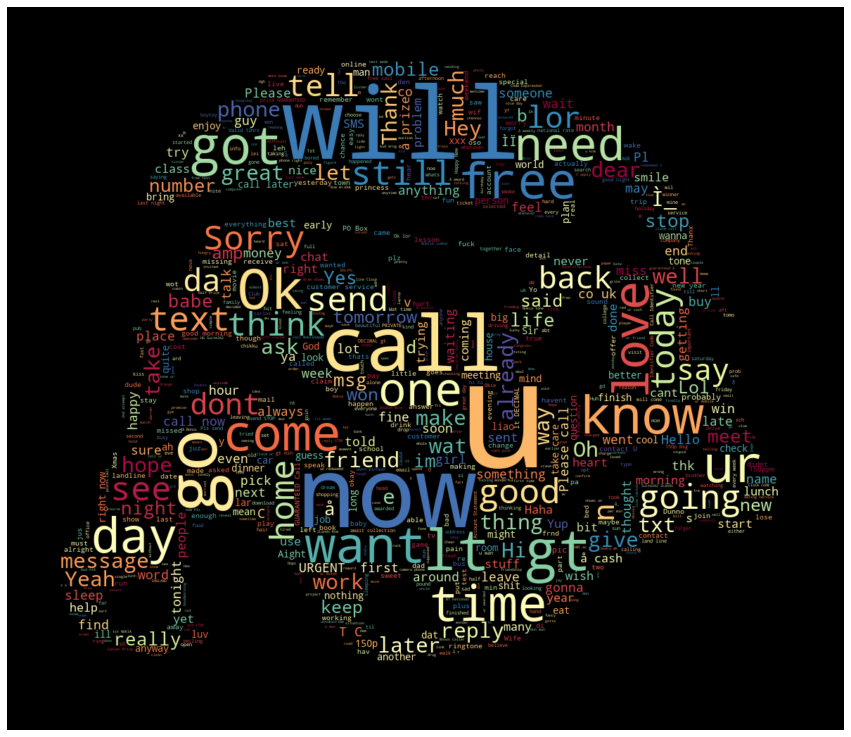

In [26]:
plt.figure(figsize=(15,15))

all_text=" ".join(data['Text'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="Spectral",mask=wordcloud_mask).generate(all_text)
# display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<a id="Ham Data WordCloud"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Ham Data WordCloud</p> </center>


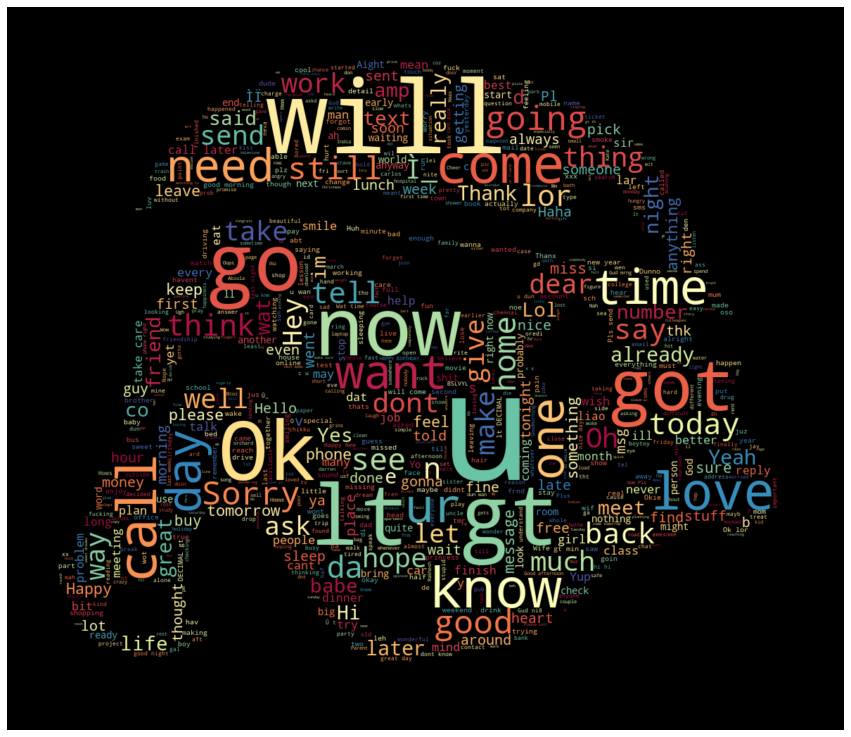

In [27]:
plt.figure(figsize=(15,15))
ham_data_wordcloud=data[data["label"]==0]
ham_text=" ".join(ham_data_wordcloud['Text'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="Spectral",mask=wordcloud_mask).generate(ham_text)
# display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<a id="Spam Data Wordcloud"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Spam Data Wordcloud</p> </center>


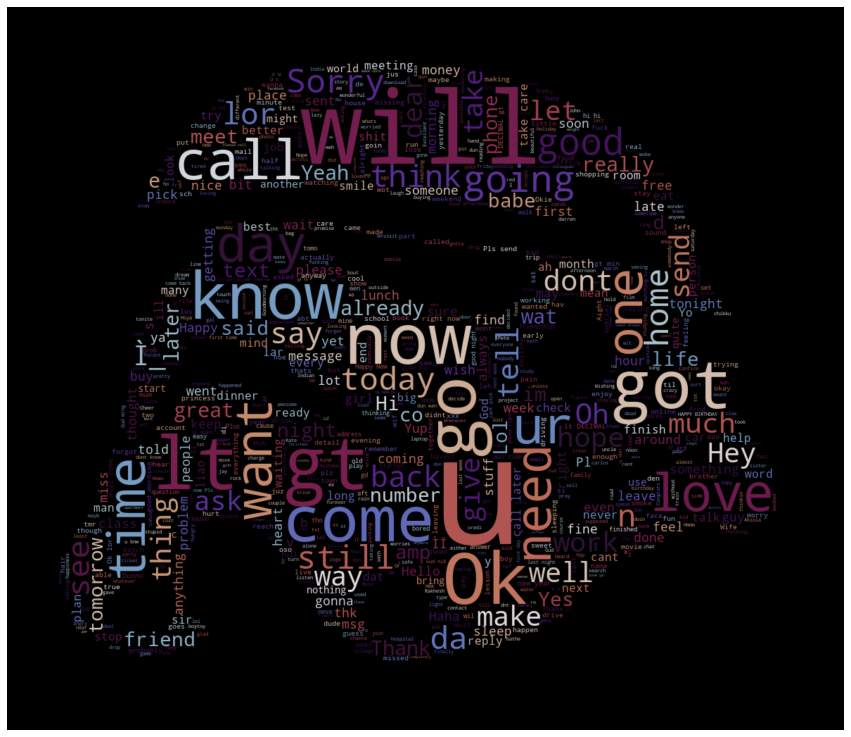

In [28]:
plt.figure(figsize=(15,15))
spam_data_wordcloud=data[data["label"]==1]
spam_text=" ".join(ham_data_wordcloud['Text'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="twilight_shifted",mask=wordcloud_mask).generate(spam_text)
# display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* ham==0
* spam==1

<a id="Most Common 30 Words From All Data"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:80%">Most Common 30 Words From ALL Data</p> </center>

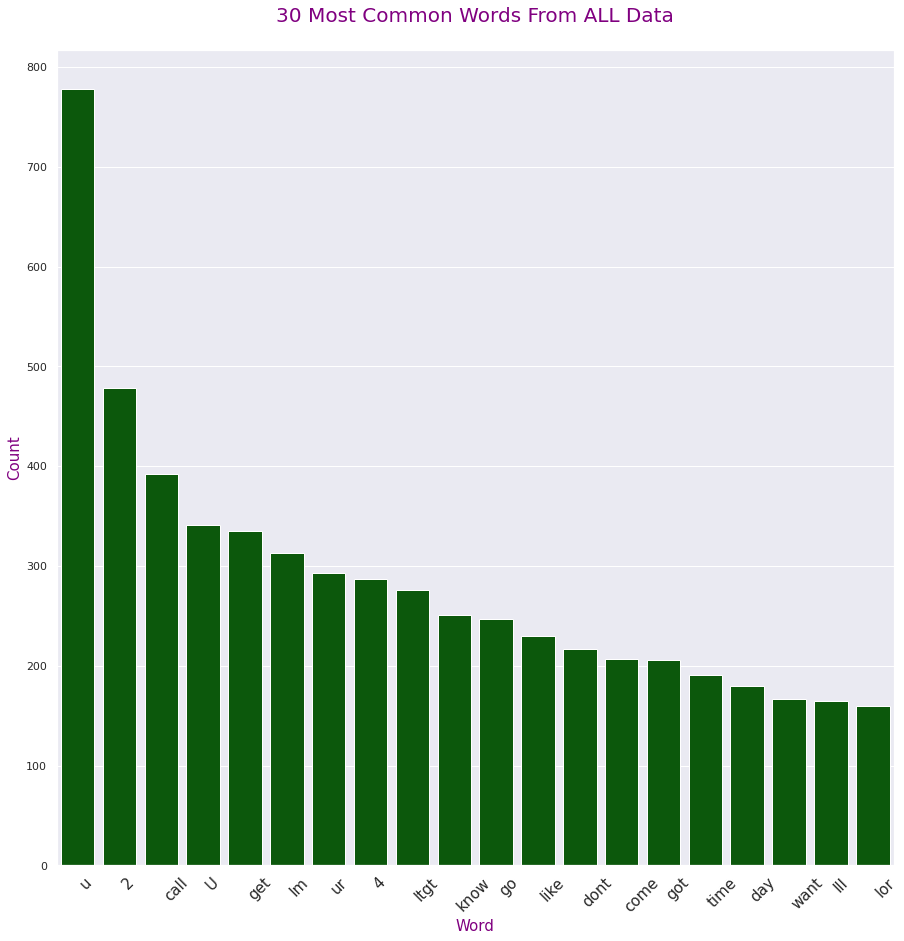

In [29]:
most_common_text=" ".join(data["Text"].values.tolist())
most_common_text = most_common_text.translate(str.maketrans('', '', string.punctuation))
word_freq=most_common_text.split()
word_freq = [word for word in word_freq if word.lower() not in stop_words]
count_words=Counter(word_freq)
most_common_words = count_words.most_common(20)
data_frame = pd.DataFrame(most_common_words, columns=['Word', 'Count'])
# plot the word counts using a barplot
sns.set(style="dark")
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.barplot(x="Word", y="Count", data=data_frame,color="darkgreen")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="left",fontsize=15)
plt.title("30 Most Common Words From ALL Data\n", fontsize=20,color="purple")
plt.xlabel("Word",fontsize=15,color="purple")
plt.ylabel("Count",fontsize=15,color="purple")

plt.show()


<a id="Most Common 30 Ham Words"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Most Common 30 Ham Words</p> </center>

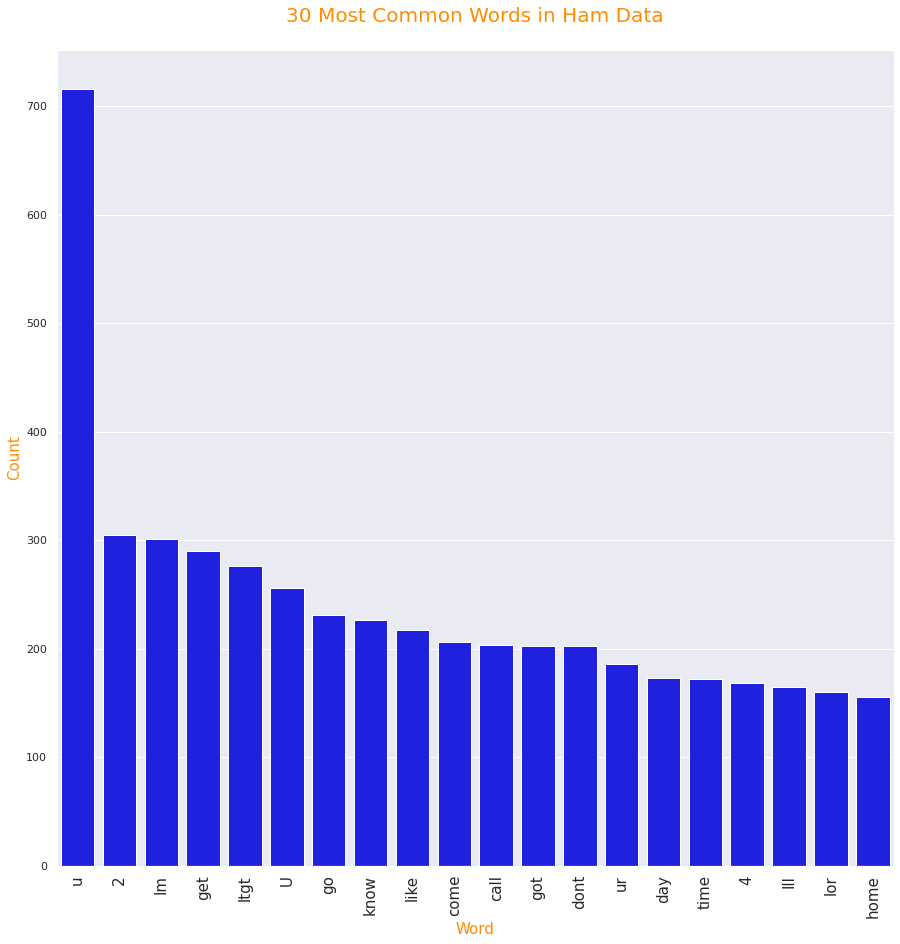

In [30]:
most_common_ham_word=data[data["label"]==0]
most_common_ham_text=" ".join(most_common_ham_word["Text"].values.tolist())
most_common_ham_text = most_common_ham_text.translate(str.maketrans('', '', string.punctuation))
ham_word_freq=most_common_ham_text.split()
ham_word_freq=[word for word in ham_word_freq if word.lower() not in stop_words]
count_ham_words=Counter(ham_word_freq)
most_common_words_ham = count_ham_words.most_common(20)
ham_data_frame = pd.DataFrame(most_common_words_ham, columns=['Word', 'Count'])
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.barplot(x="Word", y="Count", data=ham_data_frame,color="blue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center",fontsize=15)
plt.title("30 Most Common Words in Ham Data\n", fontsize=20,color="darkorange")
plt.xlabel("Word",fontsize=15,color="darkorange")
plt.ylabel("Count",fontsize=15,color="darkorange")

plt.show()


<a id="Most Common 30 Spam Words"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Most Common 30 Spam Words</p> </center>



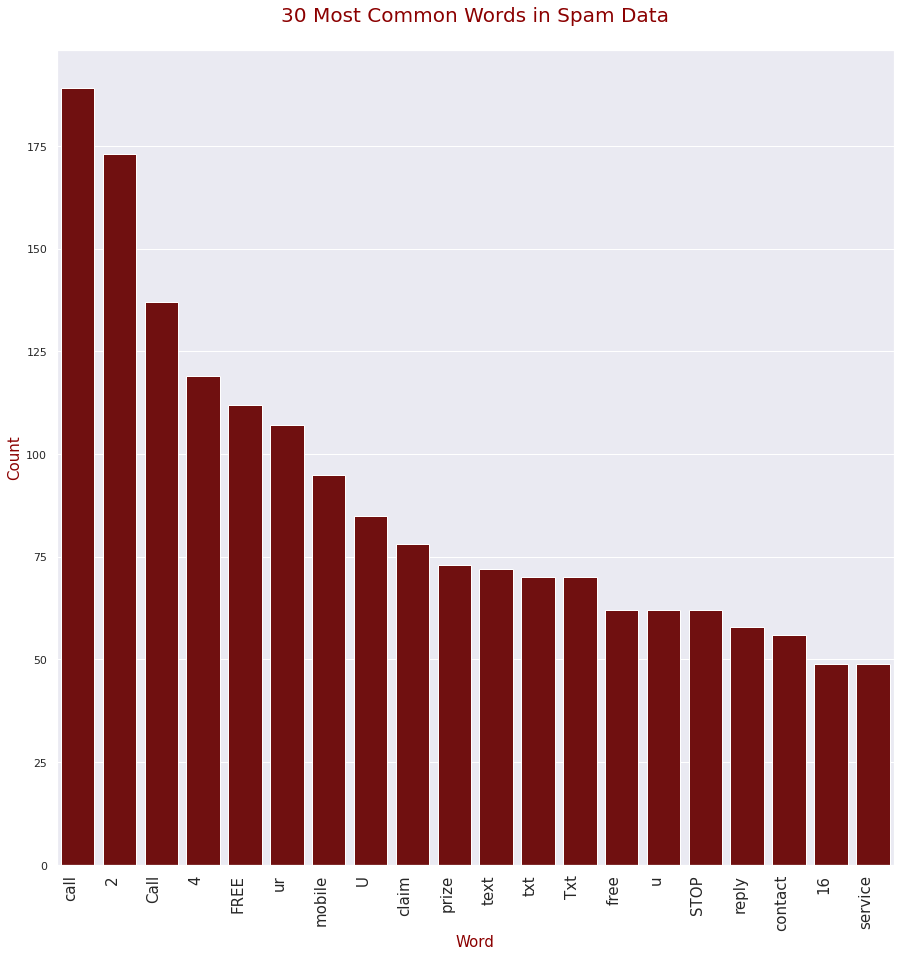

In [31]:
most_common_spam_word=data[data["label"]==1]
most_common_spam_text = " ".join(most_common_spam_word["Text"].values.tolist())
most_common_spam_text = most_common_spam_text.translate(str.maketrans('', '', string.punctuation))
spam_word_freq = most_common_spam_text.split()
spam_word_freq = [word for word in spam_word_freq if word.lower() not in stop_words]
count_spam_words = Counter(spam_word_freq)
most_common_words_spam = count_spam_words.most_common(20)
spam_data_frame = pd.DataFrame(most_common_words_spam, columns=['Word', 'Count'])
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.barplot(x="Word", y="Count", data=spam_data_frame, color="maroon")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=15)
plt.title("30 Most Common Words in Spam Data\n", fontsize=20, color="darkred")
plt.xlabel("Word", fontsize=15, color="darkred")
plt.ylabel("Count", fontsize=15, color="darkred")
plt.show()


In [32]:
data.head()

,label,Text,number_character,number_of_words,number_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


<a id="Number of Character Length Ham vs Spam"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:80%">Number of Character Length Ham vs Spam</p> </center>

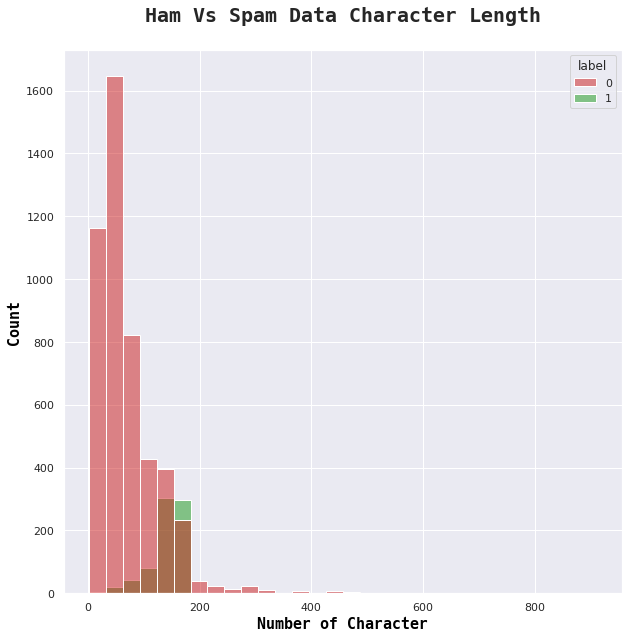

In [33]:

plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
data_filtered = data.loc[data['label'].isin([0, 1])]
label_colors = [(0.8, 0.1, 0.1), (0.1, 0.6, 0.1)]
sns.histplot(data=data_filtered, x='number_character', hue='label', palette=label_colors, bins=30)
# Set the title with custom font and make it bold
font = FontProperties()
font.set_family('serif')
font.set_file(my_font)
font.set_size(20)
font.set_weight('bold')
ax = plt.gca()
ax.set_title("Ham Vs Spam Data Character Length\n", fontproperties=font)
plt.xlabel("Number of Character", fontproperties=font, color="black", fontsize=15)
plt.ylabel("Count", fontproperties=font, color="black", fontsize=15)

plt.show()



<a id="Number of Words Length Ham vs Spam"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:80%">Number of Words Length Ham vs Spam</p> </center>


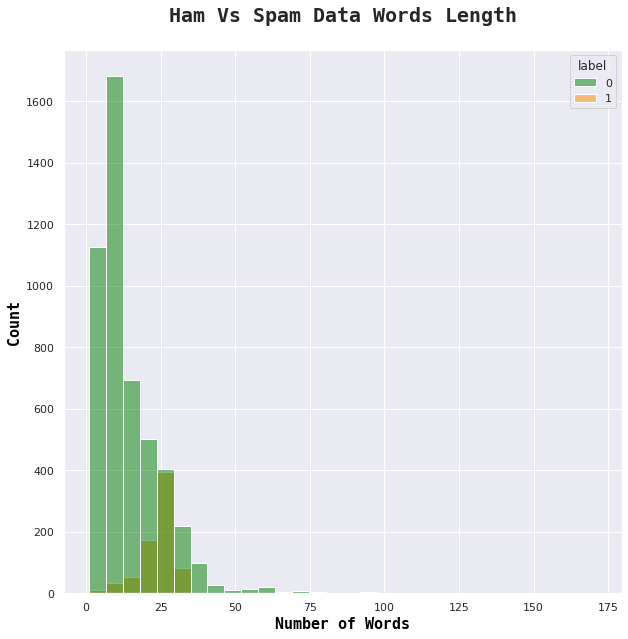

In [34]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
data_filtered = data.loc[data['label'].isin([0, 1])]
label_colors = {0: 'green', 1: 'darkorange'}
sns.histplot(data=data_filtered, x='number_of_words', hue='label', palette=label_colors, bins=30)
font = FontProperties()
font.set_family('serif')
font.set_file(my_font)
font.set_size(20)
font.set_weight('bold')
ax = plt.gca()
ax.set_title("Ham Vs Spam Data Words Length\n", fontproperties=font)

# Set the axis labels with custom font
plt.xlabel("Number of Words", fontproperties=font, color="black", fontsize=15)
plt.ylabel("Count", fontproperties=font, color="black", fontsize=15)
plt.show()


<a id="Number of Sentence Length Ham vs Spam"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:80%">Number of Sentence Length Ham vs Spam</p> </center>

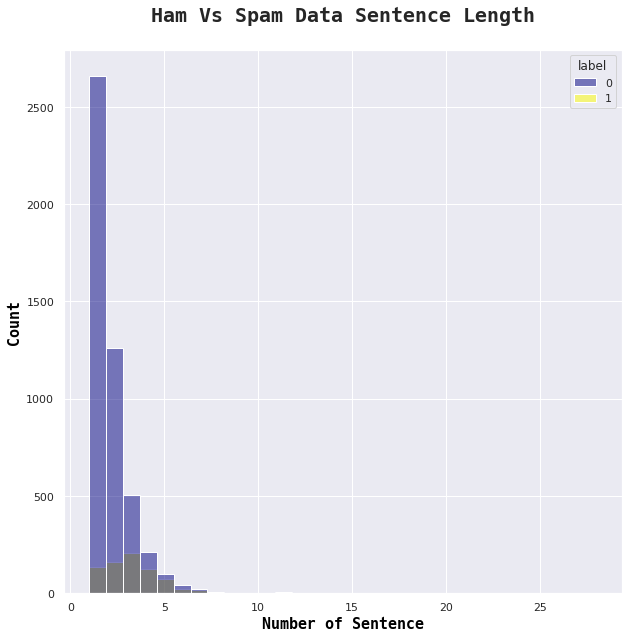

In [35]:

plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
data_filtered = data.loc[data['label'].isin([0, 1])]
label_colors = {1: 'yellow',0: 'navy', }
sns.histplot(data=data_filtered, x='number_sentence', hue='label', palette=label_colors, bins=30)
font = FontProperties()
font.set_family('serif')
font.set_file(my_font)
font.set_size(20)
font.set_weight('bold')
ax = plt.gca()
ax.set_title("Ham Vs Spam Data Sentence Length\n", fontproperties=font)
plt.xlabel("Number of Sentence", fontproperties=font, color="black", fontsize=15)
plt.ylabel("Count", fontproperties=font, color="black", fontsize=15)
plt.show()


In [36]:
data.head()

,label,Text,number_character,number_of_words,number_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


<a id="Data With Stopwords Check Model Performance"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:80%">Data With Stopwords Check Model Performance</p> </center>



In [37]:
data_with_stopword=data[["Text","label"]]

In [38]:
data_with_stopword.head()

,Text,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


<a id="ALBERT Tokenizer"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">ALBERT Tokenizer</p> </center>

In [39]:
albert_tokenizer = AutoTokenizer.from_pretrained("albert-base-v2")

<a id="ALBERT Model"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">ALBERT Model</p> </center>

In [40]:
albert_model = TFAlbertModel.from_pretrained("albert-base-v2")

Some layers from the model checkpoint at albert-base-v2 were not used when initializing TFAlbertModel: ['predictions']
- This IS expected if you are initializing TFAlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFAlbertModel were initialized from the model checkpoint at albert-base-v2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


<a id="Average Sentence Length"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Average Sentence Length</p> </center>

In [41]:
avg_len=data_with_stopword["Text"].apply(len)
avg_len=avg_len.mean()
print(f"Average Text Length is : {avg_len:.2f}")

Average Text Length is : 80.12


In [42]:
text_data=data_with_stopword["Text"]
label_data=data_with_stopword["label"]
label_data=np.array(label_data)

In [43]:
maxlen=80

<a id="Encode Data"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Encode Data</p> </center>

In [44]:
def albert_encode(final_text_data,max_len):
    input_ids=[]
    attention_masks=[]
    
    for i in range(len(final_text_data)):
        
        encode_data=albert_tokenizer.encode_plus(final_text_data[i],add_special_tokens=True,max_length=maxlen,pad_to_max_length=True,return_attention_mask=True)
        input_ids.append(encode_data['input_ids'])
        attention_masks.append(encode_data["attention_mask"])
    return np.array(input_ids),np.array(attention_masks)
        

In [45]:
text_input_ids,text_attention_masks = albert_encode(text_data,maxlen)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


<a id="Encode Data Shape"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Encode Data Shape</p> </center>

In [46]:
print('Text Input Ids Shape {} \nText Input Attention Mask Shape {} \nLabel Data shape {}'.format(text_input_ids.shape,text_attention_masks.shape,label_data.shape))

Text Input Ids Shape (5572, 80) 
Text Input Attention Mask Shape (5572, 80) 
Label Data shape (5572,)


<a id="Split Data For  Train Test "></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Split Data For  Train Test</p> </center>

In [47]:
X_train_input,X_test_input,Y_train_label,Y_test_label,train_mask,test_mask=train_test_split(text_input_ids,label_data,text_attention_masks,test_size=0.2,random_state=42,shuffle=True)

<a id="Input Data Shape"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Input Data Shape</p> </center>

In [48]:
print('Train input shape {}\nTest input shape {}\nTrain label shape {}\nTest label shape {}\nTrain attention mask shape {}\nTest attention mask shape {}'.format(X_train_input.shape,X_test_input.shape,Y_train_label.shape,Y_test_label.shape,train_mask.shape,test_mask.shape))

Train input shape (4457, 80)
Test input shape (1115, 80)
Train label shape (4457,)
Test label shape (1115,)
Train attention mask shape (4457, 80)
Test attention mask shape (1115, 80)


<a id="Create ALBERT Model"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Create ALBERT MODEL</p> </center>

In [49]:

def Create_Albert_Model():
    
    input_ids = tf.keras.Input(shape=(maxlen,), dtype="int32")
    attention_masks = tf.keras.Input(shape=(maxlen,), dtype="int32")
    output_dim = albert_model([input_ids,attention_masks])[1]
    dense_1 = tf.keras.layers.Dense(128, activation="tanh")(output_dim)
    dense_2 = tf.keras.layers.Dense(64, activation="relu")(dense_1)
    dropout = tf.keras.layers.Dropout(0.2)(dense_2)
    
    output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(dropout)

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output_layer)
    
    return model




In [50]:
model = Create_Albert_Model()
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=6e-6), metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 80)]         0                                            
__________________________________________________________________________________________________
tf_albert_model (TFAlbertModel) TFBaseModelOutputWit 11683584    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          98432       tf_albert_model[0][1]        

<a id="Train Model"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Train Model</p> </center>

In [51]:
history = model.fit(x=[X_train_input, train_mask],y=Y_train_label,validation_data=([X_test_input, test_mask], Y_test_label),
          epochs=10,batch_size=32)


Epoch 1/10
140/140 [==============================] - 85s 525ms/step - loss: 0.1578 - accuracy: 0.9414 - val_loss: 0.0686 - val_accuracy: 0.9821
Epoch 2/10
140/140 [==============================] - 71s 505ms/step - loss: 0.0466 - accuracy: 0.9892 - val_loss: 0.0440 - val_accuracy: 0.9865
Epoch 3/10
140/140 [==============================] - 70s 503ms/step - loss: 0.0230 - accuracy: 0.9962 - val_loss: 0.0301 - val_accuracy: 0.9937
Epoch 4/10
140/140 [==============================] - 70s 503ms/step - loss: 0.0193 - accuracy: 0.9962 - val_loss: 0.0327 - val_accuracy: 0.9937
Epoch 5/10
140/140 [==============================] - 70s 503ms/step - loss: 0.0128 - accuracy: 0.9978 - val_loss: 0.0331 - val_accuracy: 0.9919
Epoch 6/10
140/140 [==============================] - 70s 503ms/step - loss: 0.0138 - accuracy: 0.9966 - val_loss: 0.0438 - val_accuracy: 0.9910
Epoch 7/10
140/140 [==============================] - 70s 503ms/step - loss: 0.0202 - accuracy: 0.9966 - val_loss: 0.0346 - val_ac

<a id="Accuracy And Loss Graph"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Accuracy And Loss Graph</p> </center>

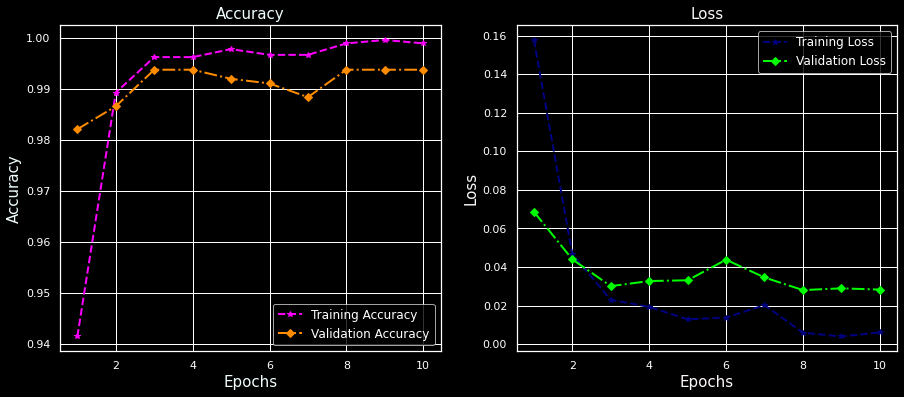

In [52]:
plt.style.use("dark_background")
fig, ax= plt.subplots(ncols=2, figsize=(15,6))

# Plot for accuracy
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,11)
ax[0].plot(epochs, loss_train, color="magenta", marker="*", lw=2, linestyle="--", label='Training Accuracy')
ax[0].plot(epochs, loss_val, color="darkorange", marker="D", lw=2, linestyle="-.", label='Validation Accuracy')
ax[0].set_title('Accuracy', fontsize=15, color="azure")
ax[0].set_xlabel('Epochs', fontsize=15, color="azure")
ax[0].set_ylabel('Accuracy', fontsize=15, color="azure")
ax[0].legend(fontsize=12)

# Plot for loss
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
ax[1].plot(epochs, loss_train, color="navy", marker="*", lw=2, linestyle="--", label='Training Loss')
ax[1].plot(epochs, loss_val, color="lime", marker="D", lw=2, linestyle="-.", label='Validation Loss')
ax[1].set_title('Loss', fontsize=15, color="snow")
ax[1].set_xlabel('Epochs', fontsize=15, color="snow")
ax[1].set_ylabel('Loss', fontsize=15, color="snow")
ax[1].legend(fontsize=12)
plt.show()


<a id="Model Prediction"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Model Prediction</p> </center>

In [53]:
pred = model.predict([X_test_input, test_mask])
final_pred = np.where(pred >= 0.5, 1, 0)


<a id="F1 Score by Threshold"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">F1 Score by Threshold</p> </center>

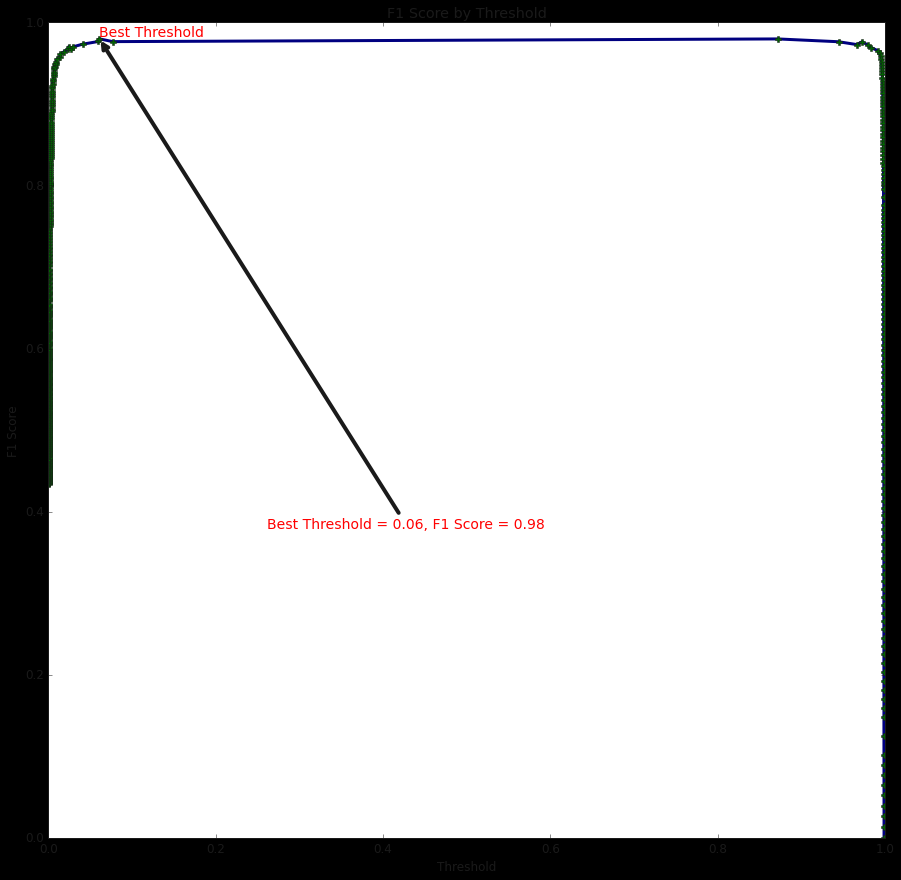

In [54]:
plt.figure(figsize=(15,15))
plt.style.use("classic")
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(Y_test_label,pred)

# calculate F1 score for each threshold
f1_scores = [f1_score(Y_test_label,pred > t) for t in thresholds]

# plot F1 score vs threshold
plt.plot(thresholds, f1_scores,marker="P",lw=3,markersize=6,color="navy",markerfacecolor='darkgreen')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score by Threshold')
# find index of highest F1 score
best_f1_index = np.argmax(f1_scores)

# get corresponding threshold value
best_threshold = thresholds[best_f1_index]

# plot text at the best point
plt.text(best_threshold, f1_scores[best_f1_index], "Best Threshold",ha="left",va="bottom", color='red', fontsize=14)
# add arrow pointing to the best point
arrow_x = best_threshold
arrow_y = f1_scores[best_f1_index]
arrow_text = f"Best Threshold = {best_threshold:.2f}, F1 Score = {arrow_y:.2f}"

plt.annotate(arrow_text, xy=(arrow_x, arrow_y), xytext=(arrow_x+0.2, arrow_y -0.6),
             arrowprops=dict(facecolor='brown', arrowstyle="->",lw=4), color='red', fontsize=14)


plt.show()


<a id="Receiver Operating Characteristic"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Receiver Operating Characteristic</p> </center>

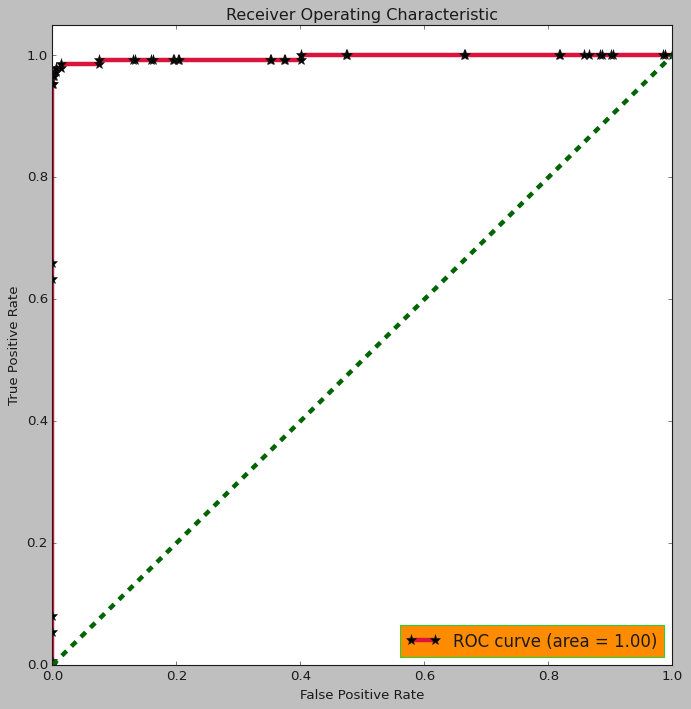

In [55]:
fpr, tpr, thresholds = roc_curve(Y_test_label,pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(10,10))
plt.style.use("classic")
plt.plot(fpr, tpr,marker="*",markersize=10,markerfacecolor="black",color='crimson', lw=4, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgreen', lw=4, linestyle='--',markersize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right",fontsize=15,edgecolor='limegreen', facecolor='darkorange')
plt.show()

<a id="Precision-Recall Curve"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Precision-Recall Curve</p> </center>

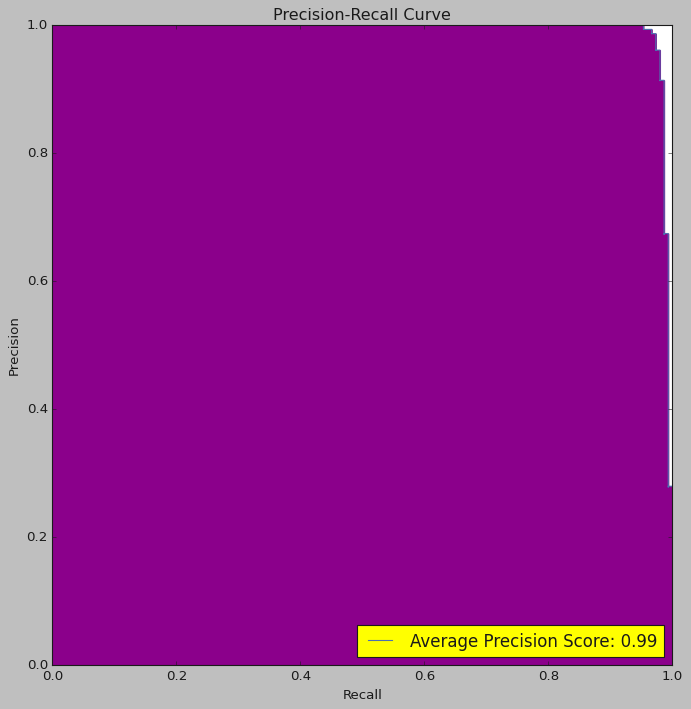

In [56]:
plt.figure(figsize=(10,10))
plt.style.use("classic")
precision, recall, thresholds = precision_recall_curve(Y_test_label, pred)
score = average_precision_score(Y_test_label, pred)
plt.step(recall, precision, color='b', where='post', label='Average Precision Score: {:.2f}'.format(score))
plt.fill_between(recall, precision, step='post',color="darkmagenta")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right", fontsize=15,facecolor="yellow")
plt.show()


<a id="ROC AUC  Score"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">ROC AUC  Score</p> </center>

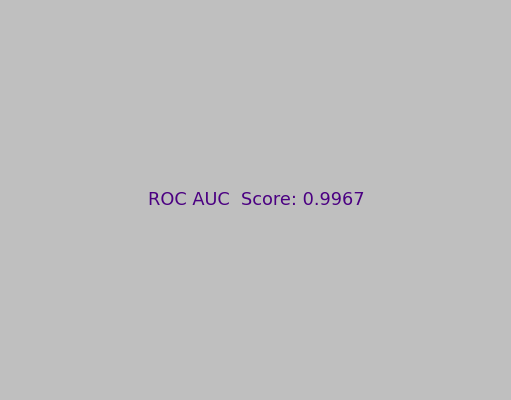

In [57]:
roc_auc = roc_auc_score(Y_test_label, pred)
plt.plot([])
plt.text(0,0, f'ROC AUC  Score: {roc_auc:.4f}', fontsize=16, ha='center', va='center',color="indigo")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

<a id="Cohen Kappa Score"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Cohen Kappa Score</p> </center>

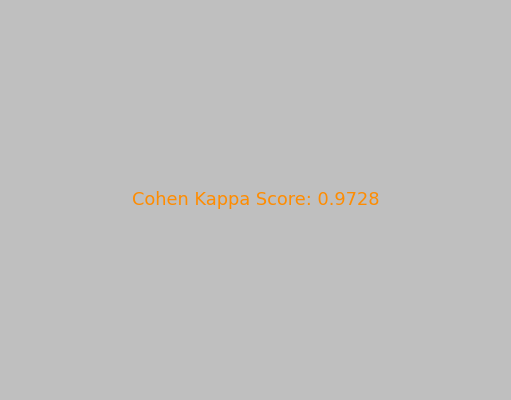

In [58]:
kappa = cohen_kappa_score(Y_test_label,final_pred)
plt.plot([])
plt.text(0,0, f'Cohen Kappa Score: {kappa:.4f}', fontsize=16, ha='center', va='center',color="darkorange")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

<a id="Matthews Correlation Coefficient"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Matthews Correlation Coefficient</p> </center>

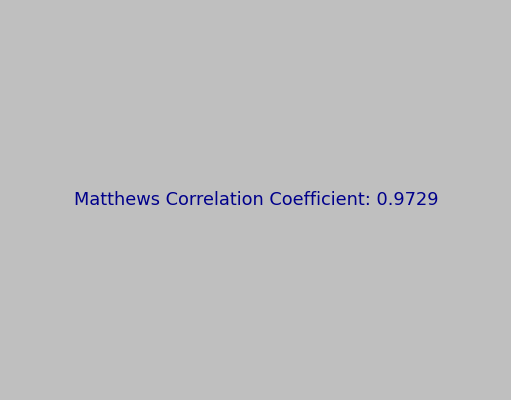

In [59]:
# Compute the Matthews correlation coefficient
mcc = matthews_corrcoef(Y_test_label, final_pred)

# Create a plot and display the MCC value as text
plt.plot([])
plt.text(0,0, f'Matthews Correlation Coefficient: {mcc:.4f}', fontsize=16, ha='center', va='center',color="darkblue")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

<a id="Logarithm Loss"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Logarithm Loss</p> </center>

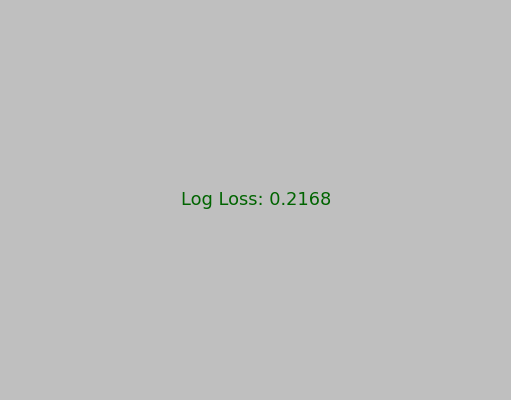

In [60]:
logarithm_loss=log_loss(Y_test_label,final_pred)
plt.plot([])
plt.text(0,0, f'Log Loss: {logarithm_loss:.4f}', fontsize=16, ha='center', va='center',color="darkgreen")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

<a id="Brier Score"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Brier Score</p> </center>

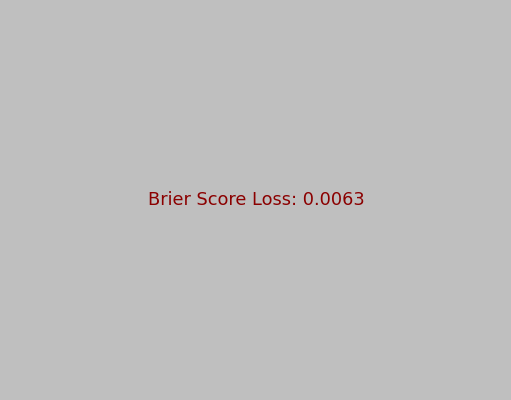

In [61]:
brier_score=brier_score_loss(Y_test_label,final_pred)
plt.plot([])
plt.text(0,0, f'Brier Score Loss: {brier_score:.4f}', fontsize=16, ha='center', va='center',color="darkred")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

<a id="Confusion Matrix"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Confusion Matrix</p> </center>

```0==Ham```

```1==Spam```

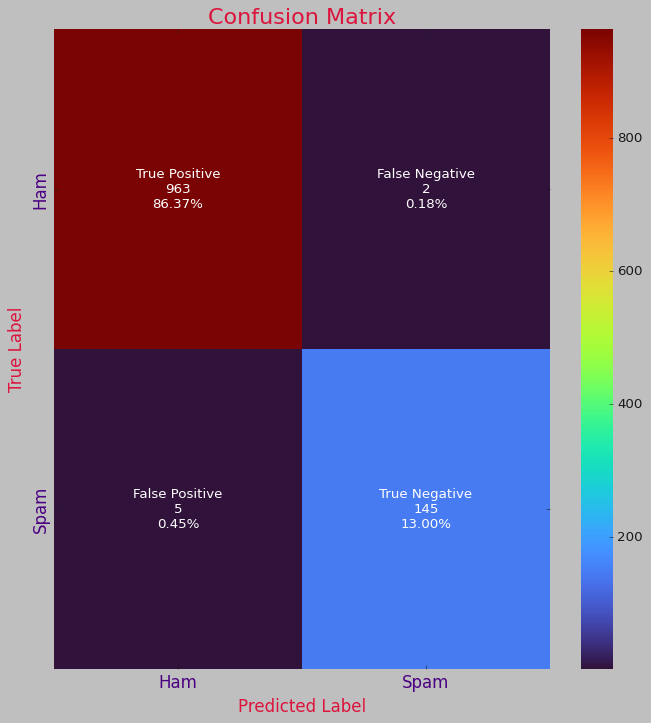

In [62]:
my_label_data=["Ham","Spam"]
my_matrix= confusion_matrix(Y_test_label, final_pred)
my_label = ["True Positive","False Negative","False Positive","True Negative"]
my_label_count=["{0:0.0f}".format(value) for value in my_matrix.flatten()]
percentage=["{0:.2%}".format(value) for value in my_matrix.flatten()/np.sum(my_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(my_label,my_label_count,percentage)]
labels=np.asarray(labels).reshape(2, 2)
# Plot confusion matrix as heatmap using Seaborn
plt.figure(figsize=(10,10))
sns.heatmap(my_matrix, annot=labels, cmap="turbo", fmt="", cbar=True,
            xticklabels=my_label_data,yticklabels=my_label_data)
plt.xlabel("Predicted Label",fontsize=15,color="crimson")
plt.ylabel("True Label",fontsize=15,color="crimson")
plt.title("Confusion Matrix",fontsize=20,color="crimson")
plt.xticks(fontsize=15,color="indigo")
plt.yticks(fontsize=15,color="indigo")
plt.show()

<a id="Classification Report"></a>
# <center> <p style="background-color:blue; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Classification Report</p> </center>

In [63]:
print(classification_report(Y_test_label,final_pred,target_names=my_label_data))

              precision    recall  f1-score   support

         Ham       0.99      1.00      1.00       965
        Spam       0.99      0.97      0.98       150

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.99      1115
weighted avg       0.99      0.99      0.99      1115



<a id="Data Without Stopwords and Check Model Performance"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:120%; color:white; text-align:center; border-radius: 50px; padding:10px;width:100%">Data Without Stopwords and Check Model Performance</p> </center>

In [64]:
data_without_stopwords=data[["Text","label"]]

In [65]:
data_without_stopwords.head()

,Text,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


<a id="Clean Data"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:120%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Clean Data</p> </center>

In [66]:

def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Remove special characters and digits
    text = re.sub(r"[^a-zA-Z]", " ", text)

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

  
    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # Convert to lowercase
    text = text.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(tokens)

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    text = ' '.join(tokens)

    return text


In [67]:
data_without_stopwords["Text"]=data_without_stopwords['Text'].apply(clean_text)


/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<a id="Average Sentence Length"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Average Sentence Length</p> </center>

In [68]:
avg_len=data_without_stopwords["Text"].apply(len)
avg_len=avg_len.mean()
print(f"Average Text Length is : {avg_len:.2f}")


Average Text Length is : 48.59


In [69]:
new_text=data_without_stopwords["Text"]
new_label=data_without_stopwords["label"]
new_label_data=np.array(new_label)


In [70]:
my_maxlen=48

<a id="Encode Data"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Encode Data</p> </center>

In [71]:
def albert_encode(final_text,my_maxlen):
    input_ids=[]
    attention_masks=[]
    
    for i in range(len(final_text)):
        
        encode_data=albert_tokenizer.encode_plus(final_text[i],add_special_tokens=True,max_length=my_maxlen,pad_to_max_length=True,return_attention_mask=True)
        input_ids.append(encode_data['input_ids'])
        attention_masks.append(encode_data["attention_mask"])
    return np.array(input_ids),np.array(attention_masks)

In [72]:
text_input_ids,text_attention_masks = albert_encode(new_text,my_maxlen)

/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


<a id="Encode Data Shape"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Encode Data Shape</p> </center>

In [73]:
print('Text Input Ids Shape {} \nText Input Attention Mask Shape {} \nLabel Data shape {}'.format(text_input_ids.shape,text_attention_masks.shape,label_data.shape))

Text Input Ids Shape (5572, 48) 
Text Input Attention Mask Shape (5572, 48) 
Label Data shape (5572,)


<a id="Split Data"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Split Data</p> </center>

In [74]:
X_train_input,X_test_input,Y_train_label,Y_test_label,train_mask,test_mask=train_test_split(text_input_ids,label_data,text_attention_masks,test_size=0.2,random_state=42,shuffle=True)

<a id="Input Data Shape"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Input Data Shape</p> </center>

In [75]:
print('Train input shape {}\nTest input shape {}\nTrain label shape {}\nTest label shape {}\nTrain attention mask shape {}\nTest attention mask shape {}'.format(X_train_input.shape,X_test_input.shape,Y_train_label.shape,Y_test_label.shape,train_mask.shape,test_mask.shape))

Train input shape (4457, 48)
Test input shape (1115, 48)
Train label shape (4457,)
Test label shape (1115,)
Train attention mask shape (4457, 48)
Test attention mask shape (1115, 48)


<a id="Create Albert Model"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Create Albert Model</p> </center>

In [76]:


def Create_Albert_Model2():
    
    input_ids = tf.keras.Input(shape=(my_maxlen,), dtype="int32")
    attention_masks = tf.keras.Input(shape=(my_maxlen,), dtype="int32")
    output_dim = albert_model([input_ids,attention_masks])[1]
    dense_1 = tf.keras.layers.Dense(128, activation="tanh")(output_dim)
    dense_2 = tf.keras.layers.Dense(64, activation="relu")(dense_1)
    dropout = tf.keras.layers.Dropout(0.2)(dense_2)
    
    output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(dropout)

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output_layer)
    
    return model



In [77]:
model2 = Create_Albert_Model2()
model2.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=6e-6), metrics=["accuracy"])
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 48)]         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 48)]         0                                            
__________________________________________________________________________________________________
tf_albert_model (TFAlbertModel) multiple             11683584    input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 128)          98432       tf_albert_model[1][1]      

<a id="Train Model"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:80%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Train Model</p> </center>

In [78]:
history2 = model2.fit(x=[X_train_input, train_mask],y=Y_train_label,validation_data=([X_test_input, test_mask], Y_test_label),
          epochs=10,batch_size=32)

Epoch 1/10
140/140 [==============================] - 59s 335ms/step - loss: 0.1197 - accuracy: 0.9729 - val_loss: 0.0915 - val_accuracy: 0.9659
Epoch 2/10
140/140 [==============================] - 44s 311ms/step - loss: 0.0554 - accuracy: 0.9865 - val_loss: 0.0736 - val_accuracy: 0.9794
Epoch 3/10
140/140 [==============================] - 44s 315ms/step - loss: 0.0366 - accuracy: 0.9917 - val_loss: 0.0581 - val_accuracy: 0.9857
Epoch 4/10
140/140 [==============================] - 44s 313ms/step - loss: 0.0279 - accuracy: 0.9944 - val_loss: 0.0616 - val_accuracy: 0.9830
Epoch 5/10
140/140 [==============================] - 44s 314ms/step - loss: 0.0242 - accuracy: 0.9937 - val_loss: 0.0578 - val_accuracy: 0.9874
Epoch 6/10
140/140 [==============================] - 44s 314ms/step - loss: 0.0153 - accuracy: 0.9966 - val_loss: 0.0769 - val_accuracy: 0.9857
Epoch 7/10
140/140 [==============================] - 44s 313ms/step - loss: 0.0151 - accuracy: 0.9969 - val_loss: 0.0555 - val_ac

<a id="Accuracy ANd Loss Graph"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:120%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Accuracy ANd Loss Graph</p> </center>

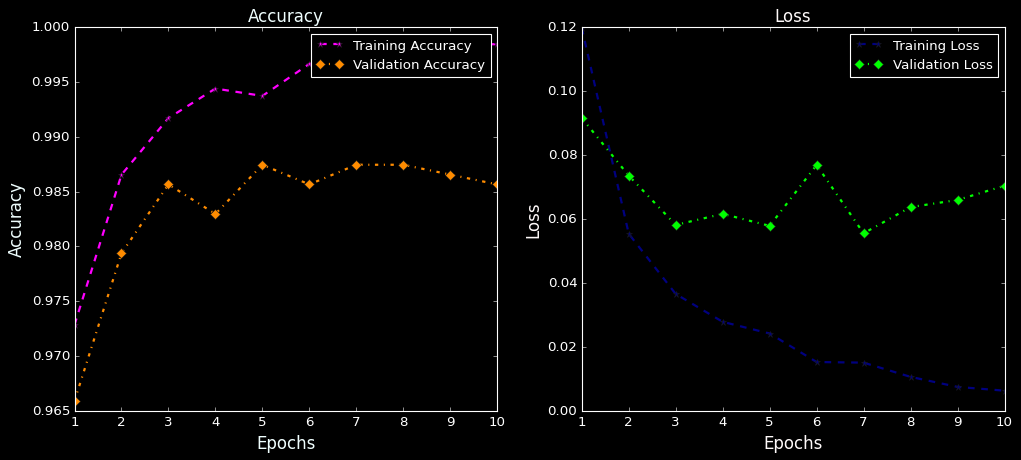

In [79]:
plt.style.use("dark_background")
fig, ax= plt.subplots(ncols=2, figsize=(15,6))

# Plot for accuracy
loss_train = history2.history['accuracy']
loss_val = history2.history['val_accuracy']
epochs = range(1,11)
ax[0].plot(epochs, loss_train, color="magenta", marker="*", lw=2, linestyle="--", label='Training Accuracy')
ax[0].plot(epochs, loss_val, color="darkorange", marker="D", lw=2, linestyle="-.", label='Validation Accuracy')
ax[0].set_title('Accuracy', fontsize=15, color="azure")
ax[0].set_xlabel('Epochs', fontsize=15, color="azure")
ax[0].set_ylabel('Accuracy', fontsize=15, color="azure")
ax[0].legend(fontsize=12)

# Plot for loss
loss_train = history2.history['loss']
loss_val = history2.history['val_loss']
epochs = range(1,11)
ax[1].plot(epochs, loss_train, color="navy", marker="*", lw=2, linestyle="--", label='Training Loss')
ax[1].plot(epochs, loss_val, color="lime", marker="D", lw=2, linestyle="-.", label='Validation Loss')
ax[1].set_title('Loss', fontsize=15, color="snow")
ax[1].set_xlabel('Epochs', fontsize=15, color="snow")
ax[1].set_ylabel('Loss', fontsize=15, color="snow")
ax[1].legend(fontsize=12)
plt.show()


<a id="Model Prediction"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:120%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Model Prediction</p> </center>

In [80]:
pred2 = model2.predict([X_test_input, test_mask])
final_pred2 = np.where(pred2 >= 0.5, 1, 0)

<a id="F1 Score by Threshold"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:100%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">F1 Score by Threshold</p> </center>

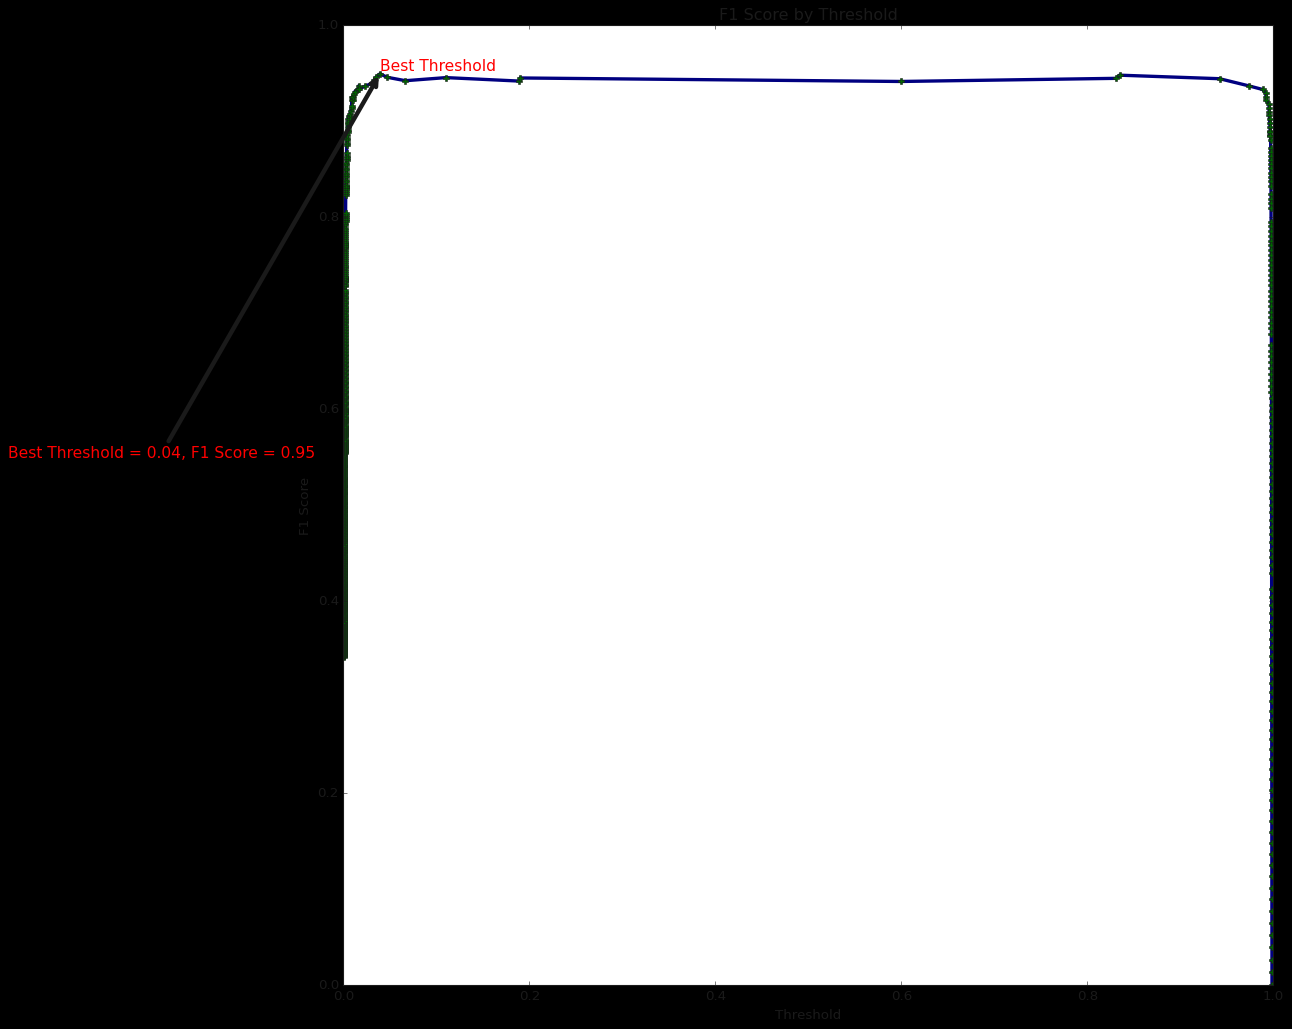

In [81]:
plt.figure(figsize=(15,15))
plt.style.use("classic")
precision, recall, thresholds = precision_recall_curve(Y_test_label,pred2)
f1_scores = [f1_score(Y_test_label,pred2 > t) for t in thresholds]
plt.plot(thresholds, f1_scores,marker="P",lw=3,markersize=6,color="navy",markerfacecolor='darkgreen')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score by Threshold')
best_f1_index = np.argmax(f1_scores)
best_threshold = thresholds[best_f1_index]
# plot text at the best point
plt.text(best_threshold, f1_scores[best_f1_index], "Best Threshold",ha="left",va="bottom", color='red', fontsize=14)
# add arrow pointing to the best point
arrow_x = best_threshold
arrow_y = f1_scores[best_f1_index]
arrow_text = f"Best Threshold = {best_threshold:.2f}, F1 Score = {arrow_y:.2f}"

plt.annotate(arrow_text, xy=(arrow_x, arrow_y), xytext=(arrow_x -0.4, arrow_y - 0.4),
             arrowprops=dict(facecolor='brown', arrowstyle="->",lw=4), color='red', fontsize=14)


plt.show()


<a id="Receiver Operating Characteristic"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:100%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Receiver Operating Characteristic</p> </center>

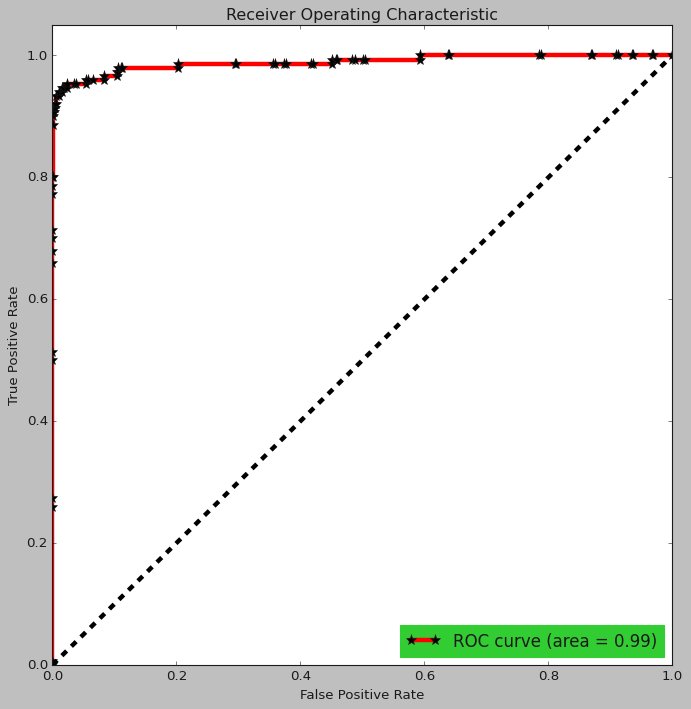

In [82]:
fpr, tpr, thresholds = roc_curve(Y_test_label,pred2)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10,10))
plt.style.use("classic")
plt.plot(fpr, tpr,marker="*",markersize=10,markerfacecolor="black",color='red', lw=4, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=4, linestyle='--',markersize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right",fontsize=15,edgecolor='limegreen', facecolor='limegreen')
plt.show()

<a id="Precision-Recall Curve"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:120%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Precision-Recall Curve</p> </center>

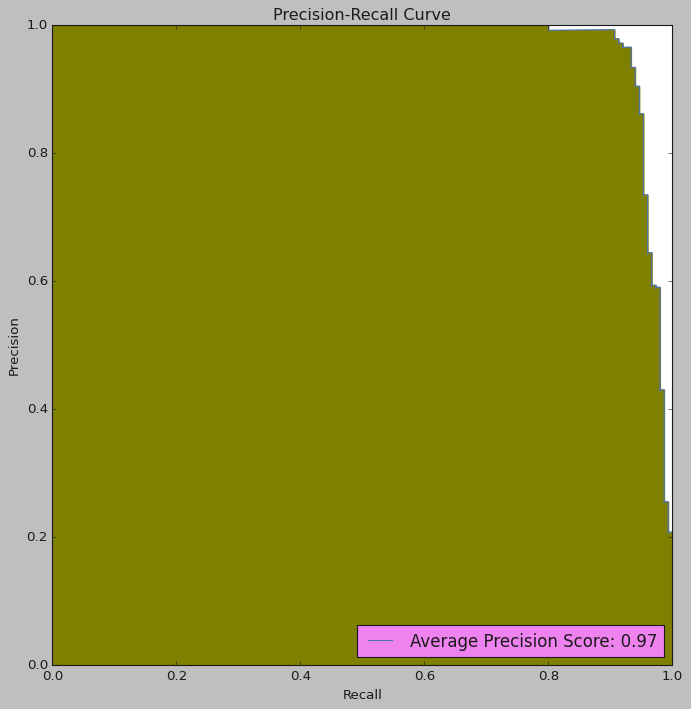

In [83]:
plt.figure(figsize=(10,10))
plt.style.use("classic")
precision, recall, thresholds = precision_recall_curve(Y_test_label, pred2)
score = average_precision_score(Y_test_label, pred2)
plt.step(recall, precision, color='b', where='post', label='Average Precision Score: {:.2f}'.format(score))
plt.fill_between(recall, precision, step='post',color="olive")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right", fontsize=15,facecolor="violet")
plt.show()


<a id="Roc Auc Score"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:120%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Roc Auc Score</p> </center>

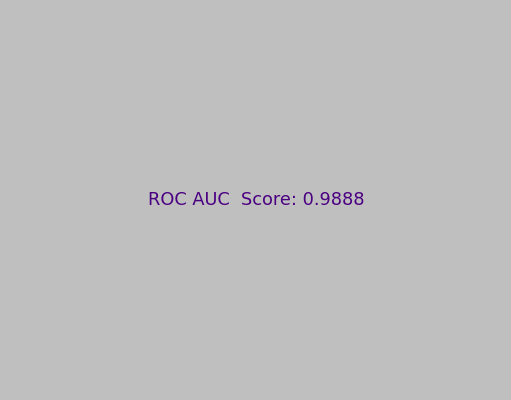

In [84]:
roc_auc = roc_auc_score(Y_test_label, pred2)
plt.plot([])
plt.text(0,0, f'ROC AUC  Score: {roc_auc:.4f}', fontsize=16, ha='center', va='center',color="indigo")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

<a id="Cohen Kappa Score"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:120%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Cohen Kappa Score</p> </center>

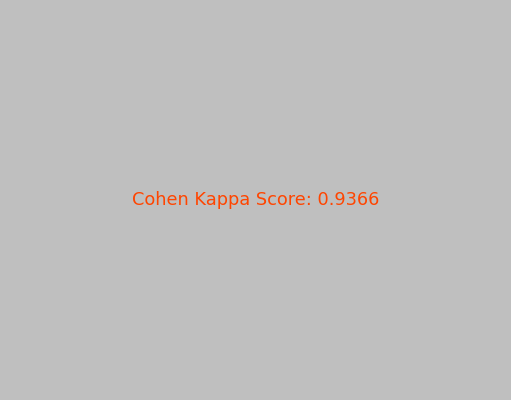

In [85]:
kappa = cohen_kappa_score(Y_test_label,final_pred2)
plt.plot([])
plt.text(0,0, f'Cohen Kappa Score: {kappa:.4f}', fontsize=16, ha='center', va='center',color="orangered")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

<a id="Matthews Correlation Coefficient"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:100%; color:white; text-align:center; border-radius: 50px; padding:10px;width:80%">Matthews Correlation Coefficient</p> </center>

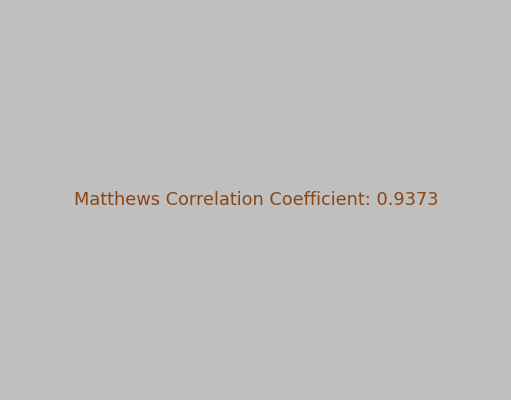

In [86]:
mcc = matthews_corrcoef(Y_test_label, final_pred2)

# Create a plot and display the MCC value as text
plt.plot([])
plt.text(0,0, f'Matthews Correlation Coefficient: {mcc:.4f}', fontsize=16, ha='center', va='center',color="saddlebrown")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

<a id="Logarithm Loss"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:120%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Logarithm Loss</p> </center>

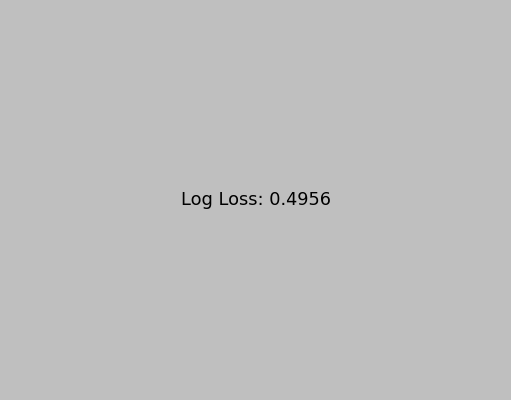

In [87]:
logarithm_loss=log_loss(Y_test_label,final_pred2)
plt.plot([])
plt.text(0,0, f'Log Loss: {logarithm_loss:.4f}', fontsize=16, ha='center', va='center',color="black")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

<a id="Brier Score"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:120%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Brier Score</p> </center>

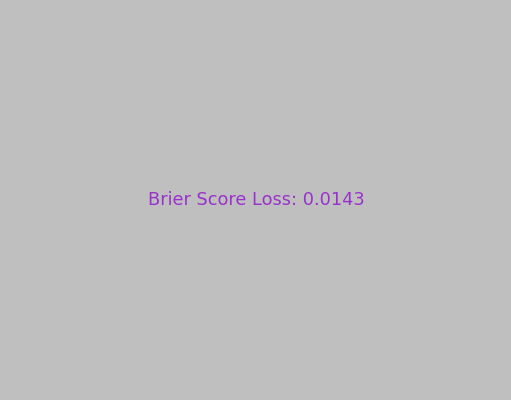

In [88]:
brier_score=brier_score_loss(Y_test_label,final_pred2)
plt.plot([])
plt.text(0,0, f'Brier Score Loss: {brier_score:.4f}', fontsize=16, ha='center', va='center',color="darkorchid")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

<a id="Confusion Matrix"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:120%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Confusion Matrix</p> </center>

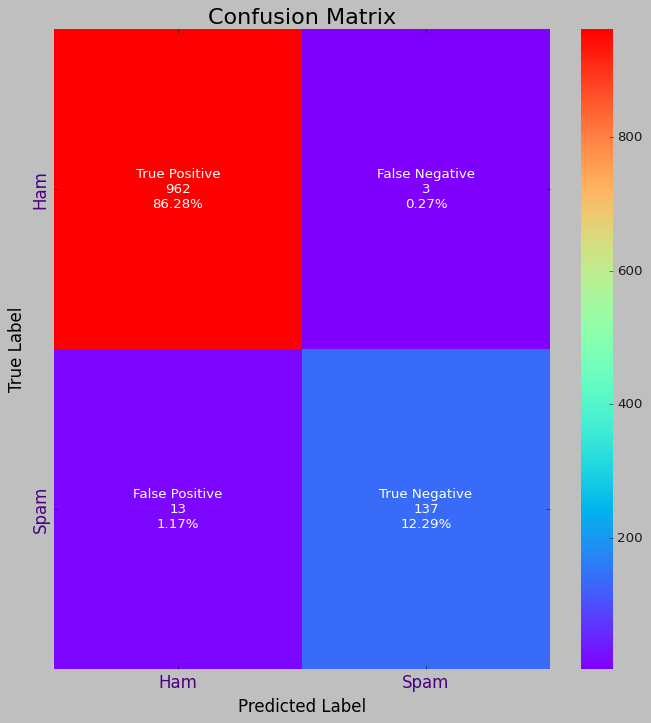

In [89]:
my_label_data=["Ham","Spam"]
my_matrix= confusion_matrix(Y_test_label, final_pred2)
my_label = ["True Positive","False Negative","False Positive","True Negative"]
my_label_count=["{0:0.0f}".format(value) for value in my_matrix.flatten()]
percentage=["{0:.2%}".format(value) for value in my_matrix.flatten()/np.sum(my_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(my_label,my_label_count,percentage)]
labels=np.asarray(labels).reshape(2, 2)
# Plot confusion matrix as heatmap using Seaborn
plt.figure(figsize=(10,10))
sns.heatmap(my_matrix, annot=labels, cmap="rainbow", fmt="", cbar=True,
            xticklabels=my_label_data,yticklabels=my_label_data)
plt.xlabel("Predicted Label",fontsize=15,color="black")
plt.ylabel("True Label",fontsize=15,color="black")
plt.title("Confusion Matrix",fontsize=20,color="black")
plt.xticks(fontsize=15,color="indigo")
plt.yticks(fontsize=15,color="indigo")
plt.show()

<a id="Classification Report"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:120%; color:white; text-align:center; border-radius: 50px; padding:10px;width:80%">Classification Report</p> </center>

In [90]:
print(classification_report(Y_test_label,final_pred2,target_names=my_label_data))

              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       965
        Spam       0.98      0.91      0.94       150

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



<a id="Custom Data Prediction"></a>
# <center> <p style="background-color:darkorange; font-family:Hack; font-size:120%; color:white; text-align:center; border-radius: 50px; padding:10px;width:80%">Custom Data Prediction</p> </center>

In [91]:

custom_message = "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today"

custom_encoding = albert_tokenizer.encode_plus(custom_message,add_special_tokens=True,max_length=my_maxlen,
                    padding='max_length',
                    truncation=True,
                    return_attention_mask=True,
                    return_tensors='tf')

custom_input_ids = custom_encoding['input_ids']
custom_mask = custom_encoding['attention_mask']

# Get the predicted probability for the custom message
custom_pred = model2.predict([custom_input_ids, custom_mask])[0][0]
custom_final_pred = np.where(custom_pred >= 0.5, 1, 0)

if custom_final_pred == 1:
    print("This message is spam (probability:", custom_pred, ")")
else:
    print("This message is ham (probability:", custom_pred, ")")


This message is ham (probability: 0.00088161917 )


In [92]:

custom_message = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

custom_encoding = albert_tokenizer.encode_plus(custom_message,add_special_tokens=True,max_length=my_maxlen,
                    padding='max_length',
                    truncation=True,
                    return_attention_mask=True,
                    return_tensors='tf')

custom_input_ids = custom_encoding['input_ids']
custom_mask = custom_encoding['attention_mask']

# Get the predicted probability for the custom message
custom_pred = model2.predict([custom_input_ids, custom_mask])[0][0]
custom_final_pred = np.where(custom_pred >= 0.5, 1, 0)

if custom_final_pred == 1:
    print("This message is spam (probability:", custom_pred, ")")
else:
    print("This message is ham (probability:", custom_pred, ")")


This message is spam (probability: 0.9980324 )


<a id="Result"></a>
# <center> <p style="background-color:green; font-family:Hack; font-size:120%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">Result</p> </center>

<div style="border-radius:20px; border:darkblue solid; padding: 20px; background-color:orange; font-size:110%; text-align:left; justify-content: flex-start">

### The first model had a higher overall accuracy and lower loss values during both training and validation compared to the second model. Specifically, the first model achieved a final validation accuracy of 0.9937 and a validation loss of 0.0283, while the second model achieved a final validation accuracy of 0.9857 and a validation loss of 0.0704. This suggests that the first model may be a better fit for the data. Furthermore, the results indicate that using stopwords in the data may have contributed to better performance of the model, as the first model was trained on data that included stopwords.

<a id="References"></a>
# <center> <p style="background-color:crimson; font-family:Hack; font-size:120%; color:white; text-align:center; border-radius: 50px; padding:10px;width:50%">References</p> </center>

* https://huggingface.co/docs/transformers/model_doc/albert

* https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

* https://towardsdatascience.com/8-metrics-to-measure-classification-performance-984d9d7fd7aa

* https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

<div style="text-align:center">
  <img src="https://www.icegif.com/wp-content/uploads/thank-you-icegif-1.gif" alt="Thank You!" style="width:800px;height:600px;">
</div>


